# Medical Cost Personal Insurance Project

In [30]:
#importing libraries and CSV files

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv(r'C:\Users\govind\Desktop\sample test\medical_cost_insurance.csv')

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# We have the dataset with given columns are as features and "charges" as target variable for predecting.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [24]:
# Great we don have any null value but some features have object, float or int as described

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [22]:
df.shape

(1338, 7)

In [21]:
#We have 1338 rows and 7 columns 

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [26]:
# Great! We do not have any missing values and won't have to drop any variables.

data_no_mv = df.copy()

### DATA EXPLORATION (EDA)

Displaying the probability distribution function (PDF) of a variable is a fantastic data exploration step. We will see how that variable is spread in the PDF. This makes it very simple to identify outliers and other irregularities. Frequently, the PDF also serves as the foundation for our decision over whether to alter a feature.

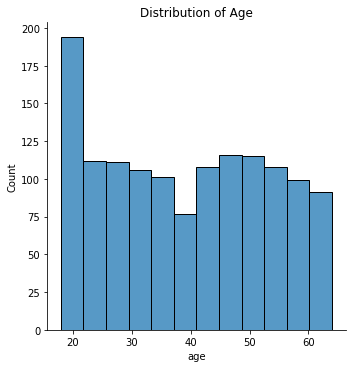

In [33]:
sns.displot(df['age'])
plt.title('Distribution of Age')
plt.show()

As the figure represents that the highest density of people is of age 20-23. From age 24 to 70, the distribution is almost equal.

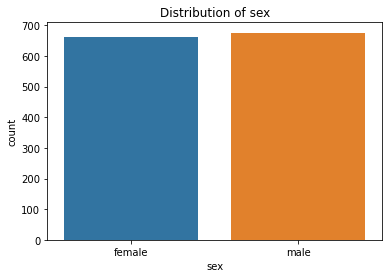

In [34]:
#Plot of sex variable
sns.countplot(x='sex',data=df)
plt.title('Distribution of sex')
plt.show()

As the sex column is categorical in nature, ratio of male and female is almost equal.

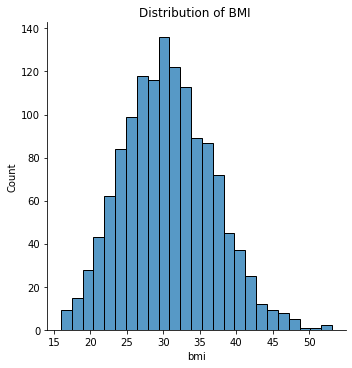

In [35]:
#Distribution of BMI column

sns.displot(df['bmi'])
plt.title('Distribution of BMI ')
plt.show()

This kind of distribution is normal distribution. The figure shows that we have an gradual increase from 15 to reach the peak values of 30. Then there is a gradual decrease. We may also notice very few outliers and we will take care of them later.

According to the research, Normal BMI range is 18.5 to 24.9. A person exceeding the limit is overweight and the person below this limit is underweight. We could see that there are more number of people in this dataset that are overweight!

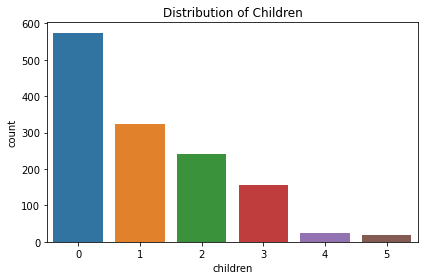

In [38]:
#Plot of Children variable
sns.countplot(df['children'])
plt.title('Distribution of Children')
plt.tight_layout()

There are many people with no childred, 1-3 category have quite population and rest 4&5 childred column have less people. 

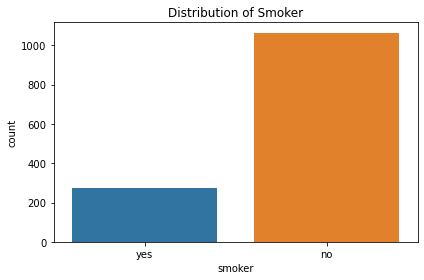

In [40]:
# plot of 'smoker' variable
sns.countplot(x=df['smoker'],data=df)
plt.title('Distribution of Smoker')
plt.tight_layout()

Poeple with smoker less in number compare to non-smoker

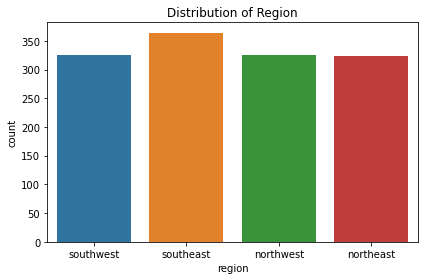

In [41]:
#plot of Charges variable
sns.countplot(x=df['region'],data=df)
plt.title('Distribution of Region')
plt.tight_layout()

We have four regions: Southwest, Southeast, Northwest, and Northeast. People are equally distributed in all the regions with southeast having slightly more number of people than other regions.

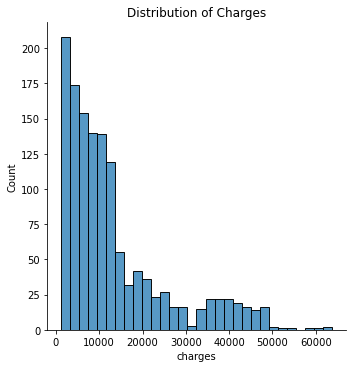

In [42]:
# distribution of charges variable

sns.displot(data_no_mv['charges'])
plt.title('Distribution of Charges')
plt.show()

Mostly, the charges are around 1000-10,000 dollars.

### Till we analysed the data, Now we will process the data to shape accordingly

As the Sex, Smoker and Region are categorical in nature but for analysing the dataset it should be encoding in numeric
So,let encoding the categorical features

In [46]:
# Categorical features: Sex, Smoker, and Region.

data = data_no_mv.copy()

# Assigning values for 'smoker' feature

data['smoker'] = data['smoker'].map({'yes':1, 'no':0})

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


Sex and region are nominal categorical variables, so we will create dummy variable

In [47]:
dummies = pd.get_dummies(data['sex'])
dummies

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [56]:
# With help of One HOt Encoder we just split the 'region' column into part
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

feature_array = ohe.fit_transform(data[['region']]).toarray()
feature_labels = ohe.categories_
print(feature_labels)

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]


In [59]:
# Creating one array by using ravel
feature_lables = np.array(feature_labels).ravel()
print(feature_labels)

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]


In [60]:
# We are now making a data frame of these labels

features = pd.DataFrame(feature_array, columns = feature_labels)

features.head()

,northeast,northwest,southeast,southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [63]:
# Now we will put OHE and dummy variable in our orignal dataset

data_new = pd.concat([data,dummies,features],axis=1)
data_new = data_new.drop(columns='region',axis=1)
data_new = data_new.drop(columns='sex',axis=1)

data_new.head()

,age,bmi,children,smoker,charges,female,male,"(northeast,)","(northwest,)","(southeast,)","(southwest,)"
0,19,27.900,0,1,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,33.770,1,0,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,33.000,3,0,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,22.705,0,0,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,28.880,0,0,3866.85520,0,1,0.0,1.0,0.0,0.0


Now it's the time to scalling the target and features and then train and test the dataset

In [68]:
X = data_new.drop(columns='charges',axis=1)
y = data_new.charges

In [69]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [70]:
X

,age,bmi,children,smoker,female,male,"(northeast,)","(northwest,)","(southeast,)","(southwest,)"
0,19,27.900,0,1,1,0,0.0,0.0,0.0,1.0
1,18,33.770,1,0,0,1,0.0,0.0,1.0,0.0
2,28,33.000,3,0,0,1,0.0,0.0,1.0,0.0
3,33,22.705,0,0,0,1,0.0,1.0,0.0,0.0
4,32,28.880,0,0,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,0,1,0.0,1.0,0.0,0.0
1334,18,31.920,0,0,1,0,1.0,0.0,0.0,0.0
1335,18,36.850,0,0,1,0,0.0,0.0,1.0,0.0
1336,21,25.800,0,0,1,0,0.0,0.0,0.0,1.0


In [100]:
#Train and test the dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=41)

In [101]:
# Model Training by Linear Regression

from sklearn.linear_model import LinearRegression

In [102]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [103]:
train_data_pred = lr.predict(x_train)

In [104]:
#R squared value

from sklearn import metrics

r2_train = metrics.r2_score(y_train, train_data_pred)
print('R squared Train value: ',r2_train)

R squared Train value:  0.7618588871070454


In [105]:
# prediction on testing data
test_data_pred = lr.predict(x_test)

In [106]:
#R squared value
r2_test = metrics.r2_score(y_test,test_data_pred)
print('R squared Test value :',r2_test)

R squared Test value : 0.6846328410017355


### Building a Predictive System

In [142]:
# Lets put the values assigned to categorical variables
# features used: age:31, sex:female, bmi:25.74, children:0, smoker:no, region:southeast,
input_data = (31, 25.74, 0, 0, 1, 0, 0, 0, 1, 0)

In [143]:
# changing inupt_data into numpy array

array_data = np.asarray(input_data)

In [144]:
# reshape the array

array_data_reshaped = array_data.reshape(1,-1)

In [145]:
prediction = lr.predict(array_data_reshaped)

print('The insurance charge is $',prediction)


The insurance charge is $ [3464.22715425]


The original price is 3756.8552. Our model's predictions are close to the original price, therefore the model is complete.